In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARMA
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn import linear_model

df=pd.read_excel("Complete-dataset-FINAL.xlsx")

### Note
Dit model is een alternatief voor de lineare regressie model. De algemene bunsiness & data understanding zijn te vinden in de Jupyter notebook van de lineare regressie. In deze notebook zal er gefocust worden op het voorspellingsmodel (ARIMA model).

# Business understanding
We gaan het ARIMA model gebruiken. Hier gaan we kijken of de data stationair is, wat betekent dat een tijdsreeks niet afhankelijk is van tijd. Eerst zullen de parameters voor het ARIMA model worden bepaald. ARIMA(p=?, d=?,q=?)

# Data preparation

In [31]:
df=df.dropna()

In [32]:
manufacturers = df.groupby("Manufacturer")
manufacturers.size().nlargest(20)

Manufacturer
Siemens                      918
Bio-Rad                      667
Roche Diagnostics            605
Beckman Coulter              349
Tosoh                        284
Abbott                       278
Sebia                        201
Trinity Biotech              185
Vitros                       139
Alere                        111
Arkray                        78
Axis-Shield                   57
Menarini                      52
Synchron                      21
Not specified                 20
Roche Diagnostics/Hitachi     18
Bayer/Metrika                 15
Bayer                          6
HemoCue                        6
JEOL                           6
dtype: int64

In [33]:
df.columns = df.columns.str.replace('Total Error', 'Total')
df.columns

Index(['Method name', 'N (no. labs)', 'Mean', 'Bias', 'CV', 'Sample',
       'Reference Value', 'Year', 'Source (CAP/EurA1c)', 'Type (Fresh/frozen)',
       'Manufacturer', 'Total'],
      dtype='object')

In [34]:
list_top10 = df['Manufacturer'].value_counts()[:10].index.tolist()
top10_manufacturers = df.loc[df['Manufacturer'].isin(list_top10)]
top10_manufacturers['Manufacturer'].value_counts()


In [35]:
top10_manufacturers = top10_manufacturers.dropna()
top10_manufacturers=top10_manufacturers[['Manufacturer', 'Total', 'Year']]
top10_manufacturers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3737 entries, 0 to 4683
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  3737 non-null   object 
 1   Total         3737 non-null   float64
 2   Year          3737 non-null   float64
dtypes: float64(2), object(1)
memory usage: 116.8+ KB


<AxesSubplot:xlabel='Year', ylabel='Total'>

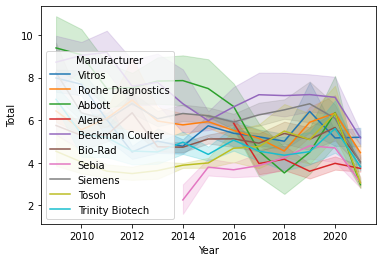

In [36]:
sns.lineplot(x="Year", y="Total",
             hue="Manufacturer", 
             data=top10_manufacturers)

# Modeling

#model regressie trainen en testen
#R2 zegt iets over de bruikbaarheid van je model
traindata, testdata = train_test_split(Siemens, train_size=0.65, test_size=0.35, random_state=42)

#eerst afhankelijke variabele, dus hierbij 'Manufacturer'
mod1 = ols(formula='Year ~ Total', data=traindata).fit()
print(mod1.summary())

In [37]:
# traindata, testdata = train_test_split(df, train_size=0.65, test_size=0.35, random_state=42)

# X_train, X_test, Y_train, Y_test = train_test_split(df["Year"].values, df["Manufacturer"].values, test_size = .20, random_state = 40)


In [65]:
# Check for stationarity of the time-series data
# We will look for p-value. In case, p-value is less than 0.05, the time series data can said to have stationarity
from statsmodels.tsa.stattools import adfuller
manufacturers = top10_manufacturers.groupby("Manufacturer")

#differentiate with last value -? first value is always nan
#AIC input is to compute the optimal number iteratively.
for name, data in manufacturers: 
    data= data.dropna()
    print(name) 
    df_stationarityTest = adfuller(data['Total'].diff().dropna(), autolag='AIC')    
    # print("P-value: one ", df_stationarityTest[1])

    # df_stationarityTest = adfuller(data['Total'].diff().diff().dropna(), autolag='AIC')    
    # print("P-value: two ", df_stationarityTest[1])

    # df_stationarityTest = adfuller(data['Total'].diff().diff().diff().dropna(), autolag='AIC')    
    # print("P-value: three ", df_stationarityTest[1])

    # df_stationarityTest = adfuller(data['Total'].diff().diff().diff().diff().dropna(), autolag='AIC')    
    # print("P-value: four", df_stationarityTest[1])
    print("\n")
    print(f'ADF Statistic: {df_stationarityTest[0]}')
    print(f'n_lags: {df_stationarityTest[1]}')
    print(f'p-value: {df_stationarityTest[1]}')
    for key, value in df_stationarityTest[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')    

Abbott


ADF Statistic: -5.469566816634822
n_lags: 2.4157069378753383e-06
p-value: 2.4157069378753383e-06
Critial Values:
   1%, -3.4554613060274972
Critial Values:
   5%, -2.8725931472675046
Critial Values:
   10%, -2.5726600403359887
Alere


ADF Statistic: -6.933670414502965
n_lags: 1.0681195031019741e-09
p-value: 1.0681195031019741e-09
Critial Values:
   1%, -3.4942202045135513
Critial Values:
   5%, -2.889485291005291
Critial Values:
   10%, -2.5816762131519275
Beckman Coulter


ADF Statistic: -13.733234877910453
n_lags: 1.1298129981266867e-25
p-value: 1.1298129981266867e-25
Critial Values:
   1%, -3.4495033946549123
Critial Values:
   5%, -2.8699787979596136
Critial Values:
   10%, -2.5712658305164955
Bio-Rad


ADF Statistic: -7.45391814949185
n_lags: 5.5767754625682596e-11
p-value: 5.5767754625682596e-11
Critial Values:
   1%, -3.4405290941696722
Critial Values:
   5%, -2.8660314117601575
Critial Values:
   10%, -2.569161868277147
Roche Diagnostics


ADF Statistic: -11.3971961422

### Analyse van p-values
Een p-value van 0.05 of er onder ligt, betekent dat de data stationair is. De resultaten laten zien dat de data niet stationair is. Dus ARIMA(p=?,d=,q=?)

Abbott


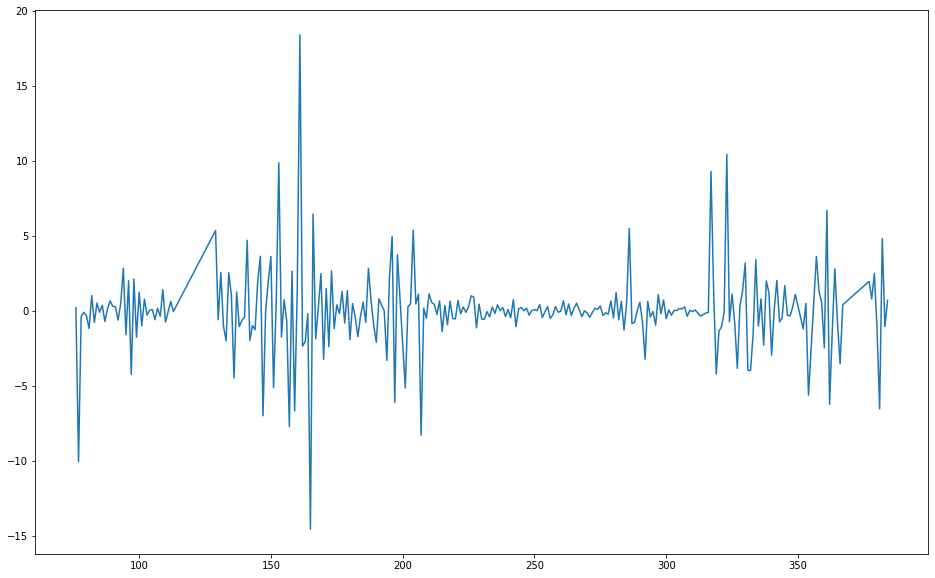

Alere


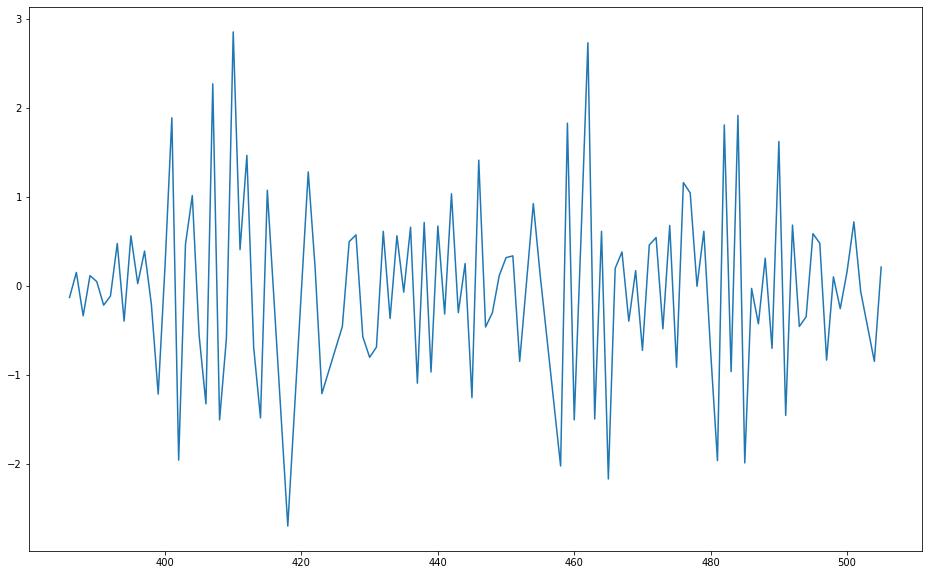

Beckman Coulter


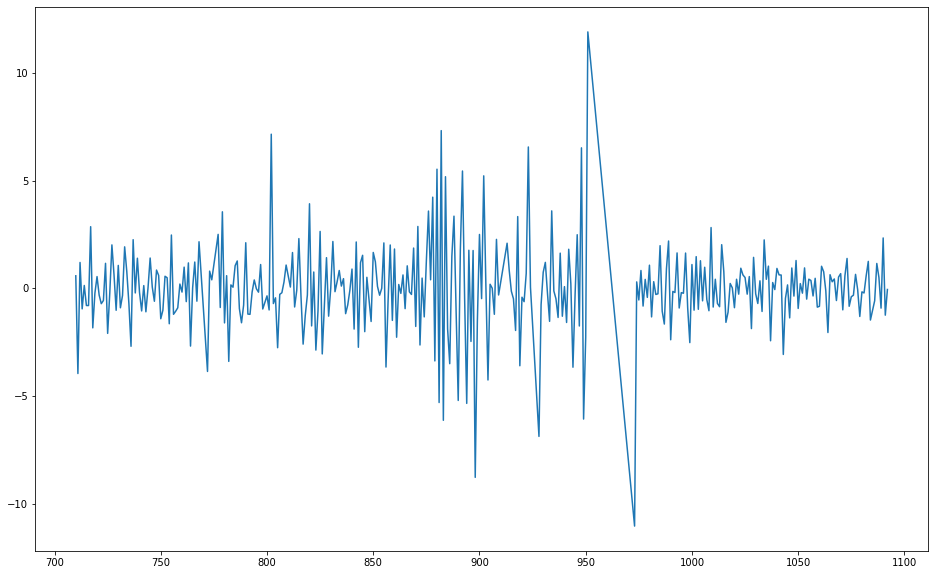

Bio-Rad


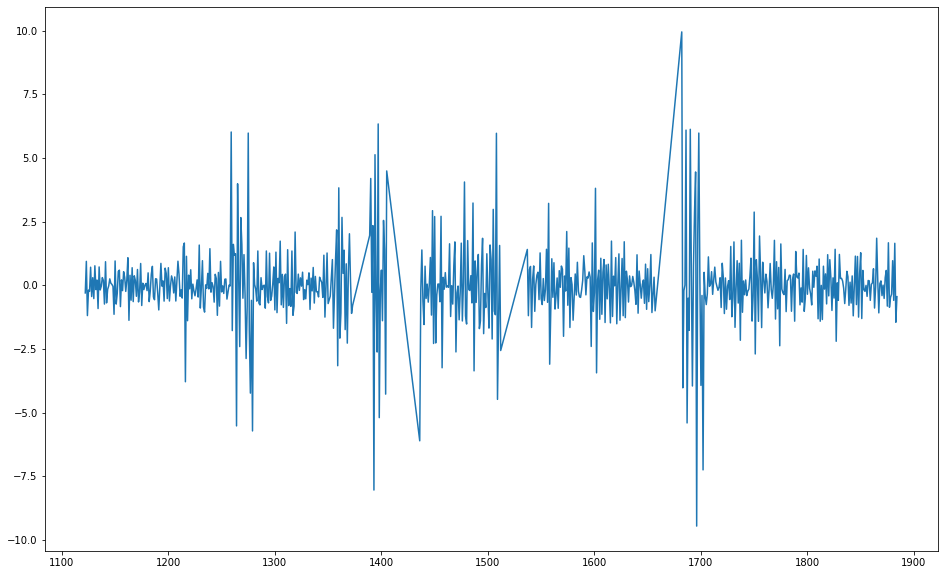

Roche Diagnostics


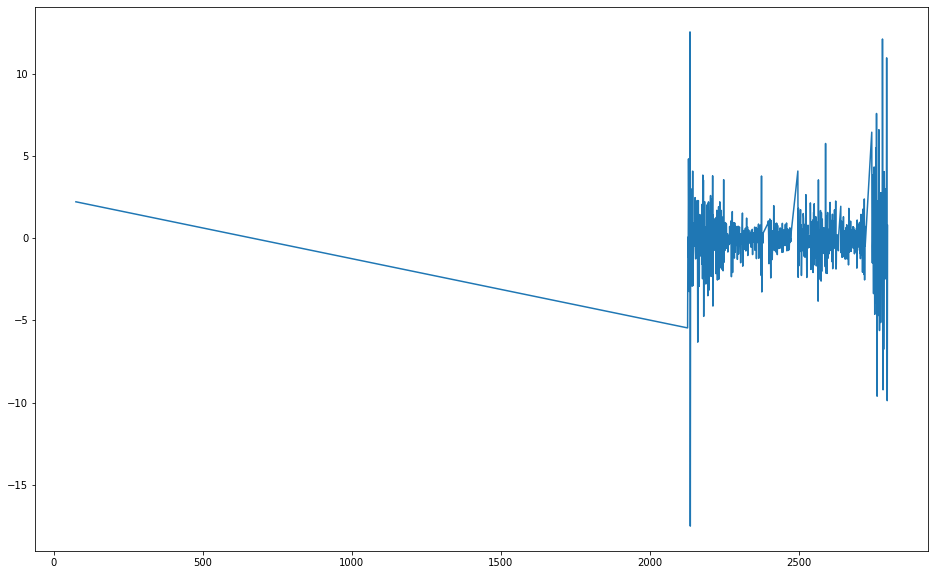

Sebia


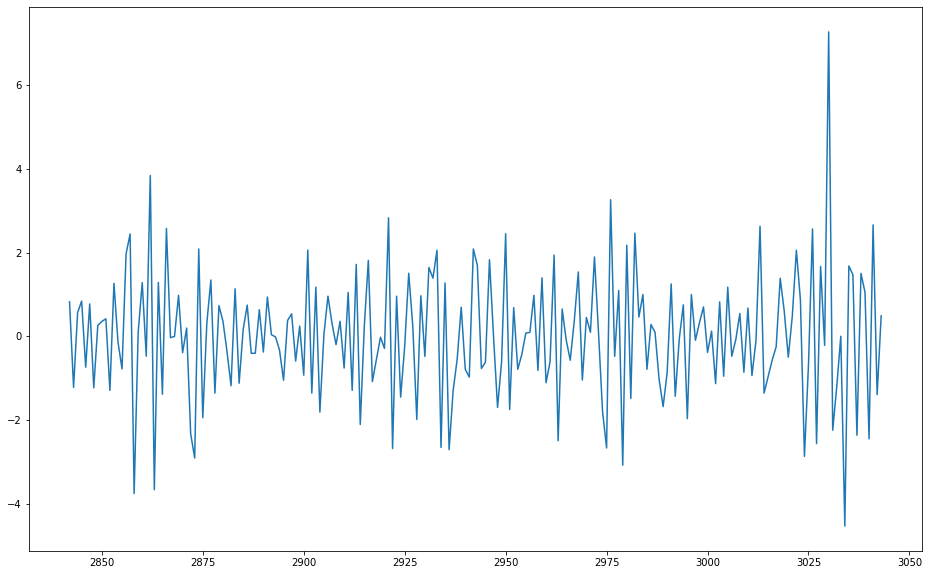

Siemens


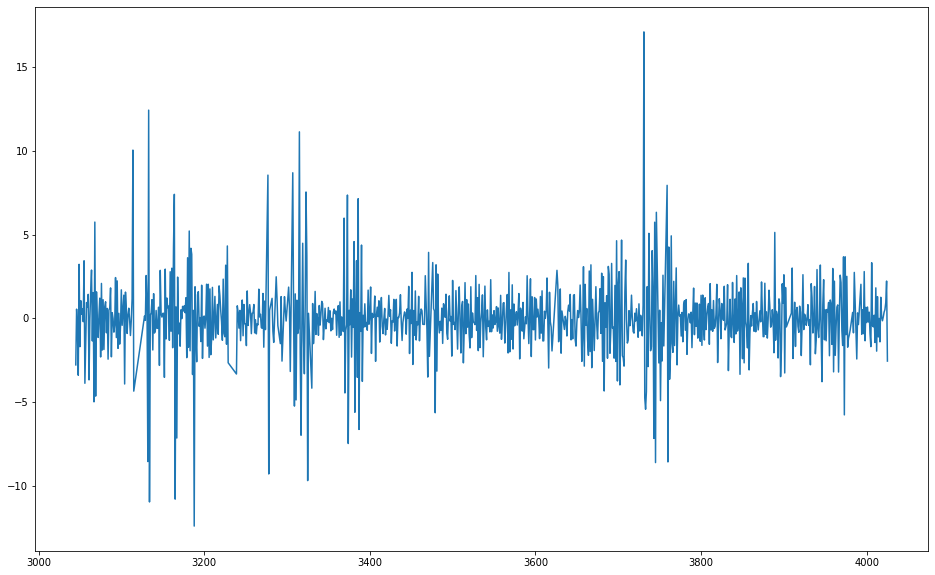

Tosoh


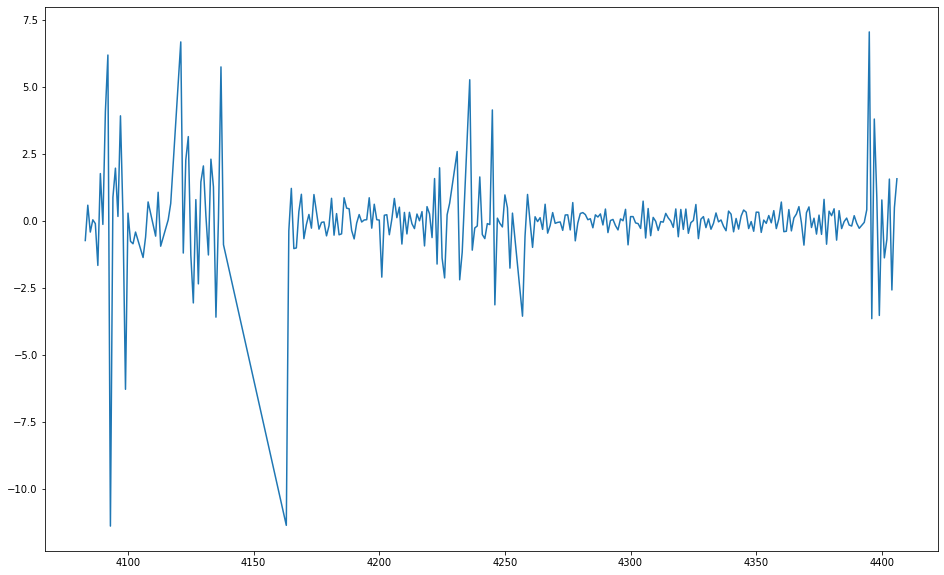

Trinity Biotech


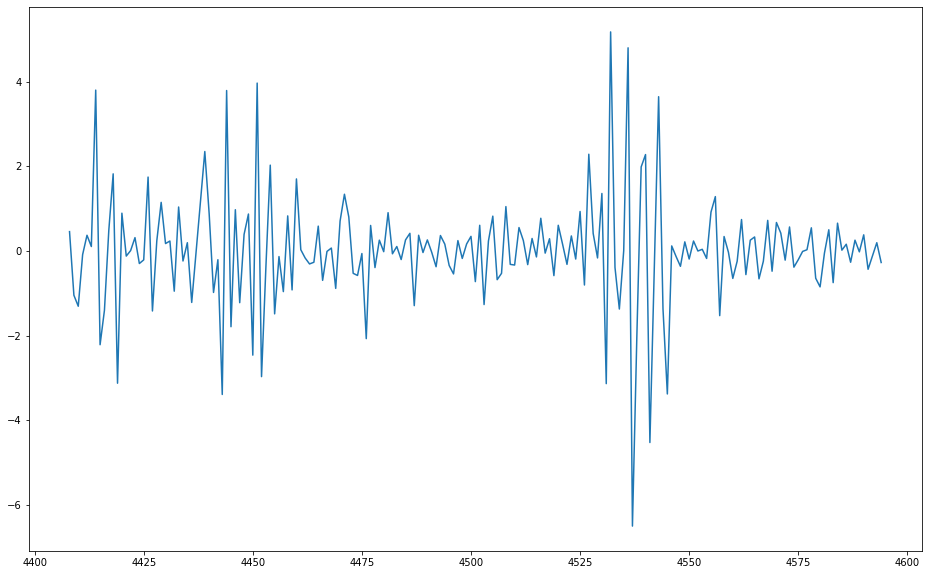

Vitros


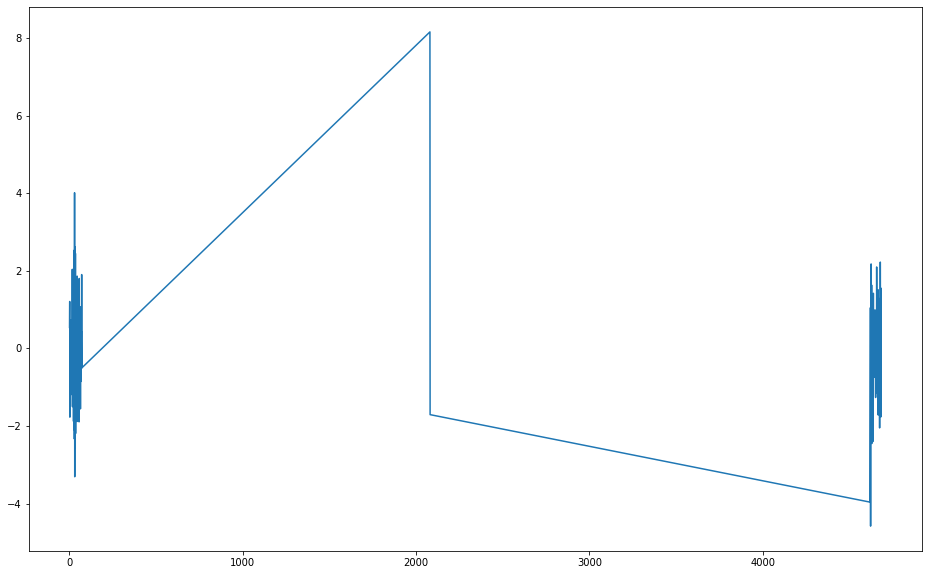

In [66]:
for name, data in manufacturers:
    print(name)
    data['Total'].diff().plot(figsize=(16,10))
    plt.show()

Abbott


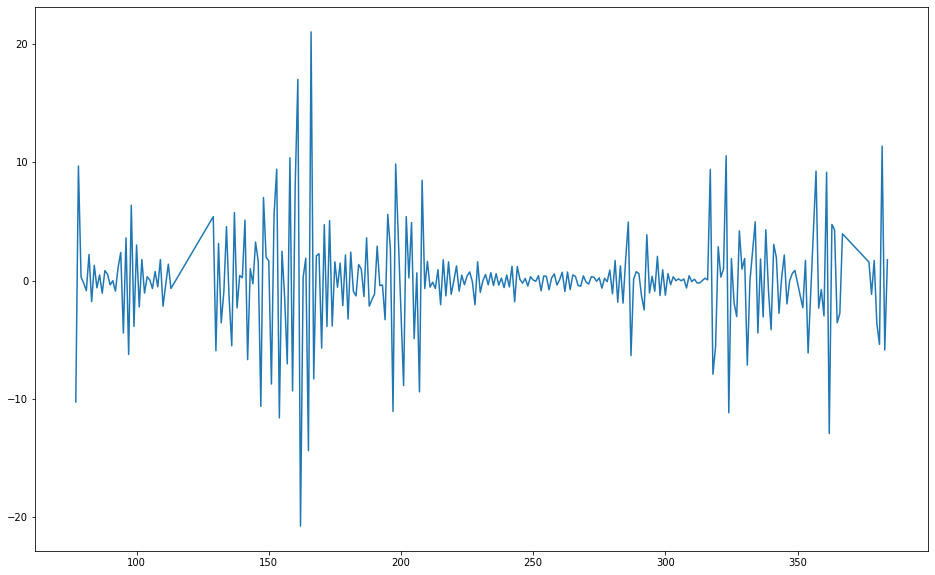

Alere


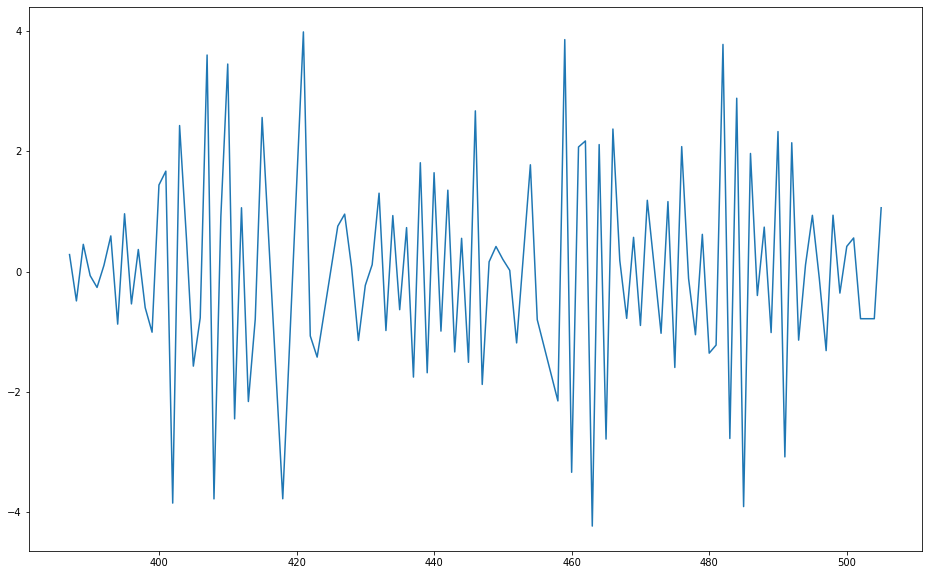

Beckman Coulter


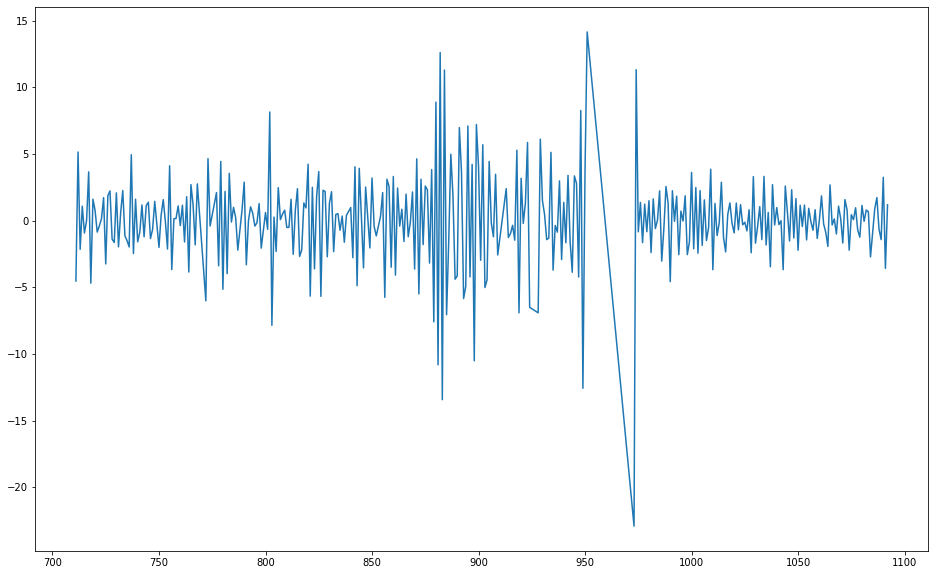

Bio-Rad


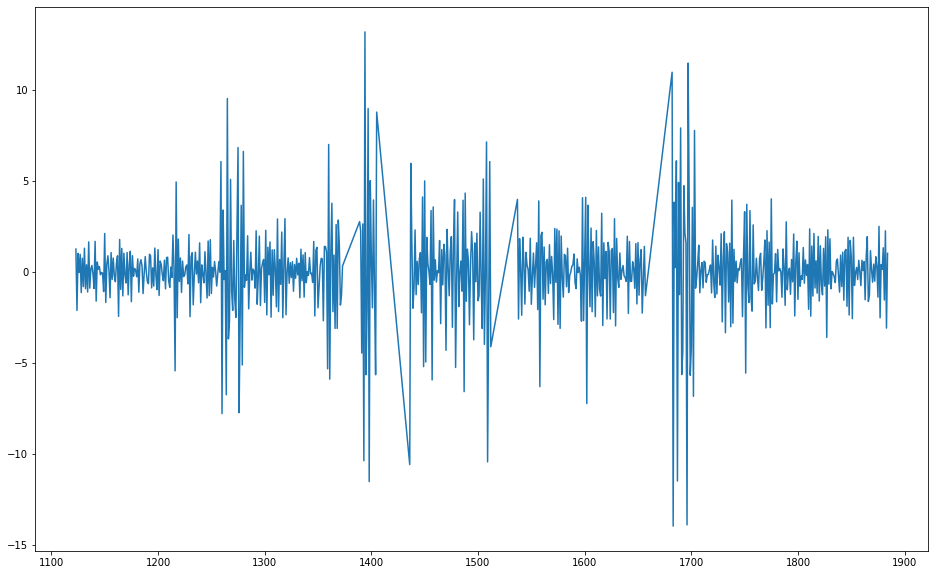

Roche Diagnostics


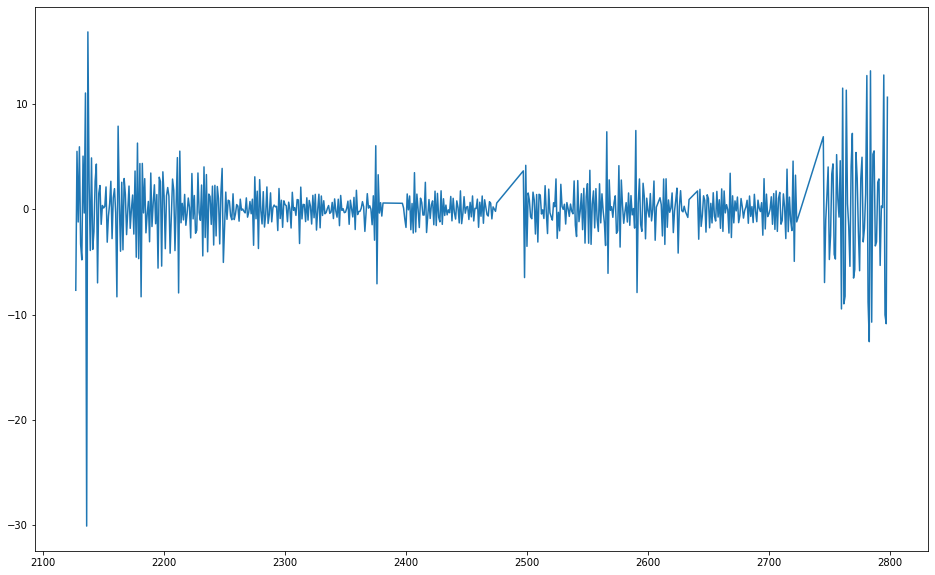

Sebia


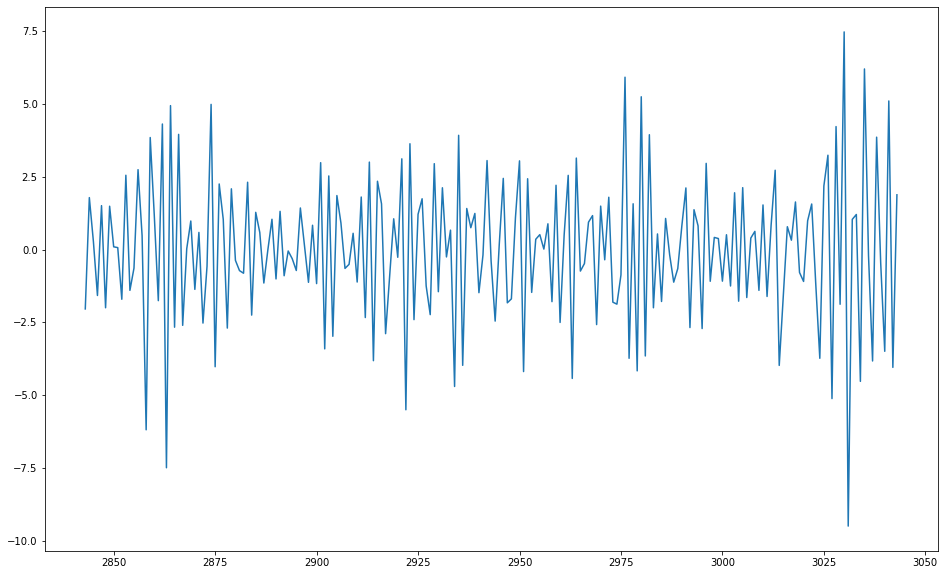

Siemens


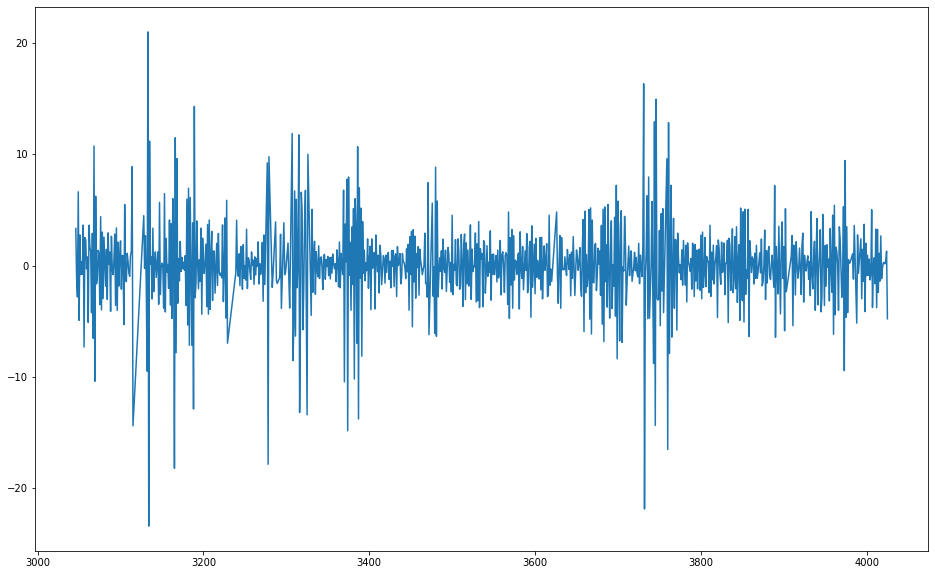

Tosoh


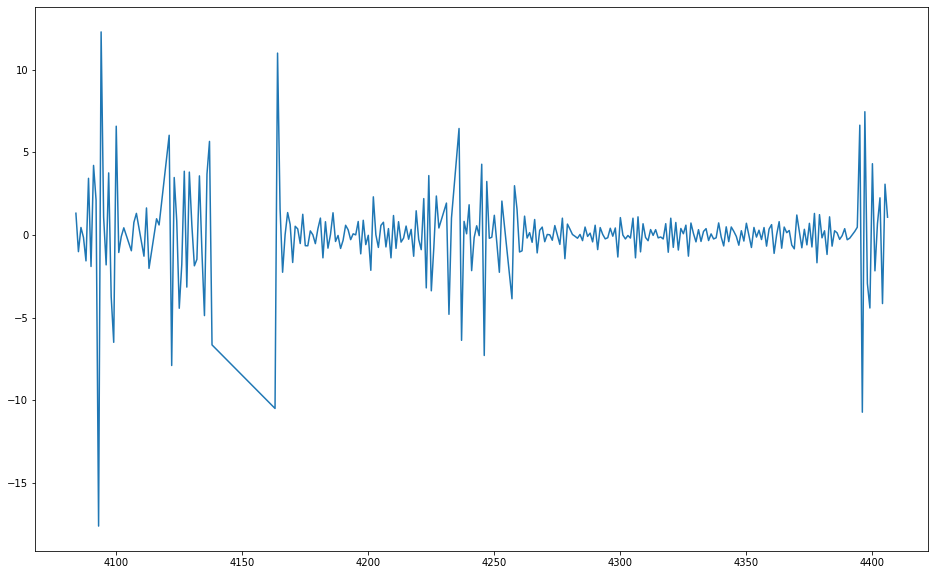

Trinity Biotech


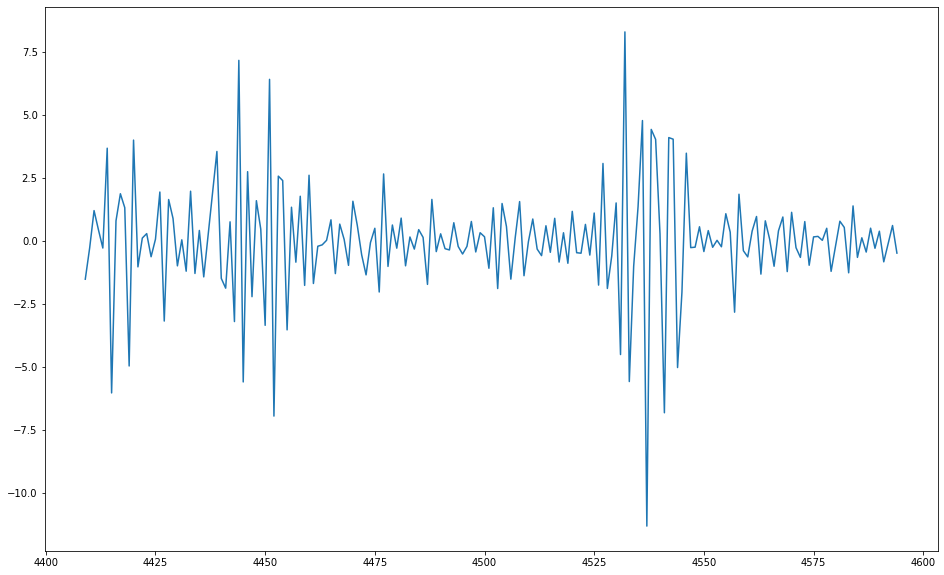

Vitros


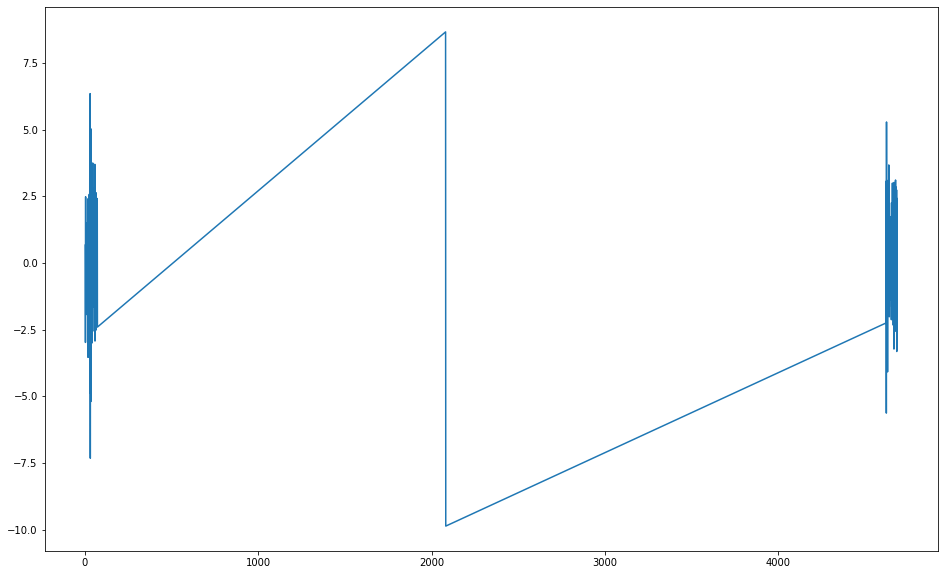

In [67]:
for name, data in manufacturers:
    print(name)
    data['Total'].diff().diff().plot(figsize=(16,10))
    plt.show()


#2x diff = I (ARIMA)

C:\Users\femke\AppData\Roaming\Python\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\femke\AppData\Roaming\Python\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\femke\AppData\Roaming\Python\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.w

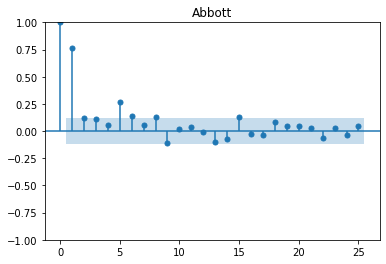

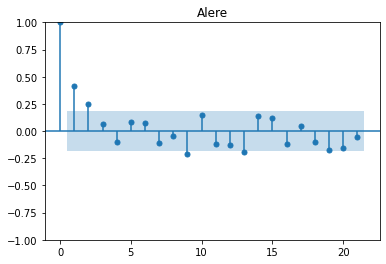

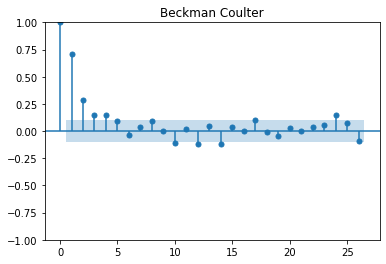

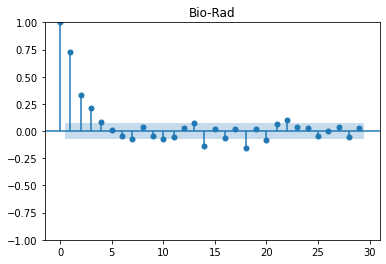

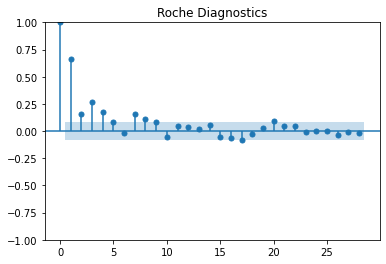

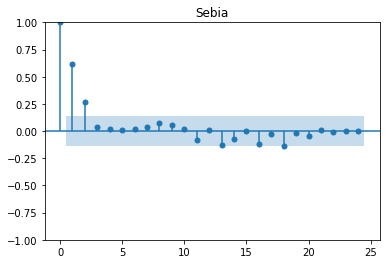

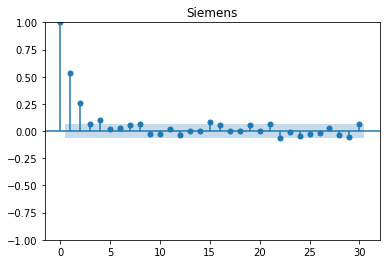

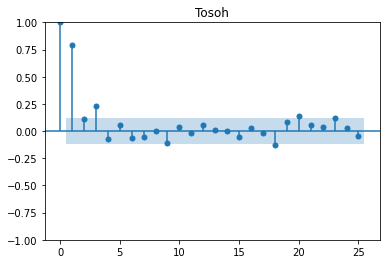

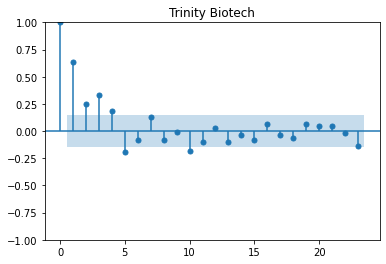

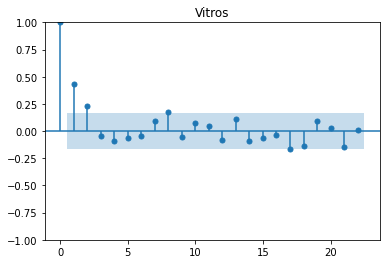

In [51]:
from statsmodels.graphics.tsaplots import plot_pacf

for name, data in manufacturers: 
    pacf = plot_pacf(data['Total'], title=name)

### Analayse van partial autocorrelation
Bij alle grafieken is te zien dat de eerste lag het meest significant is. Daarom nemen we p met de waarde 1. Dus ARIMA(p=1,d=?,q=?)

In [ ]:
from pandas.plotting import autocorrelation_plot
for name, data in manufacturers: 
    print(name)
    autocorrelation_plot(data['Total'])
    plt.show()

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
# Create training and test data
for name, data in manufacturers:
    train_data = data['Total'][:len(df)-100]
    test_data = data['Total'][len(df)-100:]
    #
    # Instantiate and fit the AR model with training data
    #
    ar_model = AutoReg(train_data, lags=1).fit()
    #
    # Print Summary
    #
    print(ar_model.summary())
    

                            AutoReg Model Results                             
Dep. Variable:                  Total   No. Observations:                  278
Model:                     AutoReg(1)   Log Likelihood                -654.749
Method:               Conditional MLE   S.D. of innovations              2.572
Date:                Sun, 22 May 2022   AIC                           1315.499
Time:                        15:51:00   BIC                           1326.371
Sample:                             1   HQIC                          1319.861
                                  278                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4144      0.277      5.106      0.000       0.872       1.957
Total.L1       0.7597      0.039     19.725      0.000       0.684       0.835
                                    Roots           

C:\Users\femke\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\femke\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\femke\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\femke\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\femke\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: Val

In [ ]:
# for name, data in manufacturers:
#     tempdf = df[['Year', 'Total']].dropna()

#     X = tempdf.iloc[:, :-1].values
#     Y = tempdf.iloc[:, 1].values

#     from sklearn.model_selection import train_test_split
#     X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#     from sklearn.linear_model import LinearRegression
#     regressor = LinearRegression()
#     regressor.fit(X_train, Y_train)

#     print(regressor.intercept_)
#     from matplotlib import pyplot

    
# for name, data in manufacturers:
#     # line plot for Total Error with seaborn
#     # if name == "Abbott":
#         # sns.set(rc = {'figure.figsize':(25,8)})
#         # l = sns.lineplot(x='Year', y='Total Error', data=data)
#         # sns.lineplot(x='Year', y={regressor.intercept_}, data=data)
#         # l.set_title(name)
#         # plt.show()
#         pyplot.plot('Year','Total Error',data=tempdf, color='red')
#         pyplot.plot('Year','Total Error', data=regressor.intercept_)

# Arima model

In [ ]:
slotkoers_model = ARIMA(ARMA_data_slotkoers, order=(0,1,0))
slotkoers_model_fit = slotkoers_model.fit()
print(slotkoers_model_fit.summary())
fig = slotkoers_model_fit.plot_predict(n.adhead=3,dynamic=False)

#P>|z| significant? onder 0.01